# Strategy 8 - Simple CNN

Dans ce notebook, nous allons tester une version simplifiée du CNN pour la prédiction des prix. Cette version utilise :
1. Moins d'indicateurs techniques (5 au lieu de 23)
2. Une architecture CNN plus légère (1 couche conv au lieu de 3)
3. Moins de paramètres à entraîner
4. Early stopping pour éviter le surapprentissage

In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from strategies.simple_cnn import SimpleCNNStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
data_handler = DataHandler(ticker='AAPL', start_date='2010-01-01', end_date='2022-01-01')
data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



## Test de la stratégie CNN simplifiée

In [ ]:
# Création et entraînement de la stratégie
cnn_strategy = SimpleCNNStrategy(
    window_size=20,
    n_splits=5,
    epochs=30,
    batch_size=32,
    patience=5
)

signals = cnn_strategy.generate_signals(data)

# Affichage des scores de validation croisée
print("Cross-validation MSE scores:")
for i, score in enumerate(cnn_strategy.cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")
print(f"\nMean MSE: {np.mean(cnn_strategy.cv_scores):.6f}")
print(f"Std MSE: {np.std(cnn_strategy.cv_scores):.6f}")

c:\Users\lisam\Documents\GitHub\AMP_Algorithmic_Trading\strategies\simple_cnn.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill')
c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is 

Cross-validation MSE scores:
Fold 1: 0.000275
Fold 2: 0.000143
Fold 3: 0.004107

Mean MSE: 0.001508
Std MSE: 0.001838


c:\Users\lisam\Documents\GitHub\AMP_Algorithmic_Trading\strategies\simple_cnn.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill')


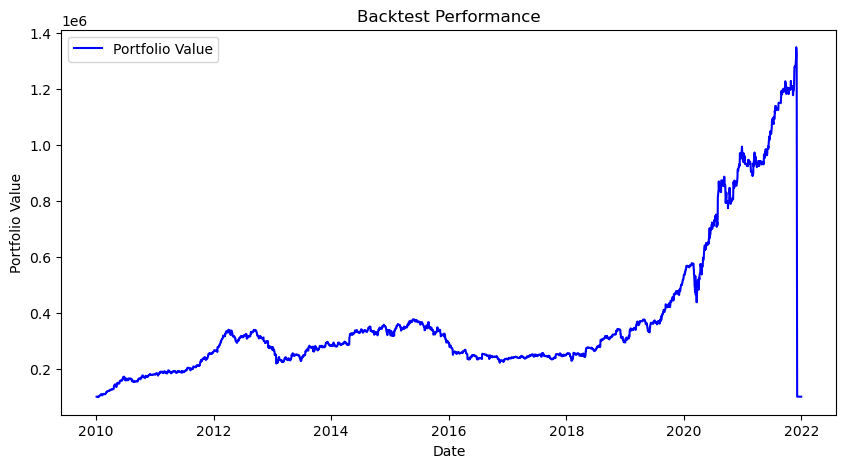


Résultats du backtest:
Final Value: 100000.0000
Return: 0.0000
Sharpe Ratio: 0.4726
Max Drawdown: -0.9259


In [4]:
# Backtest de la stratégie
backtest = Backtest(data, cnn_strategy)
results = backtest.run()
print("\nRésultats du backtest:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

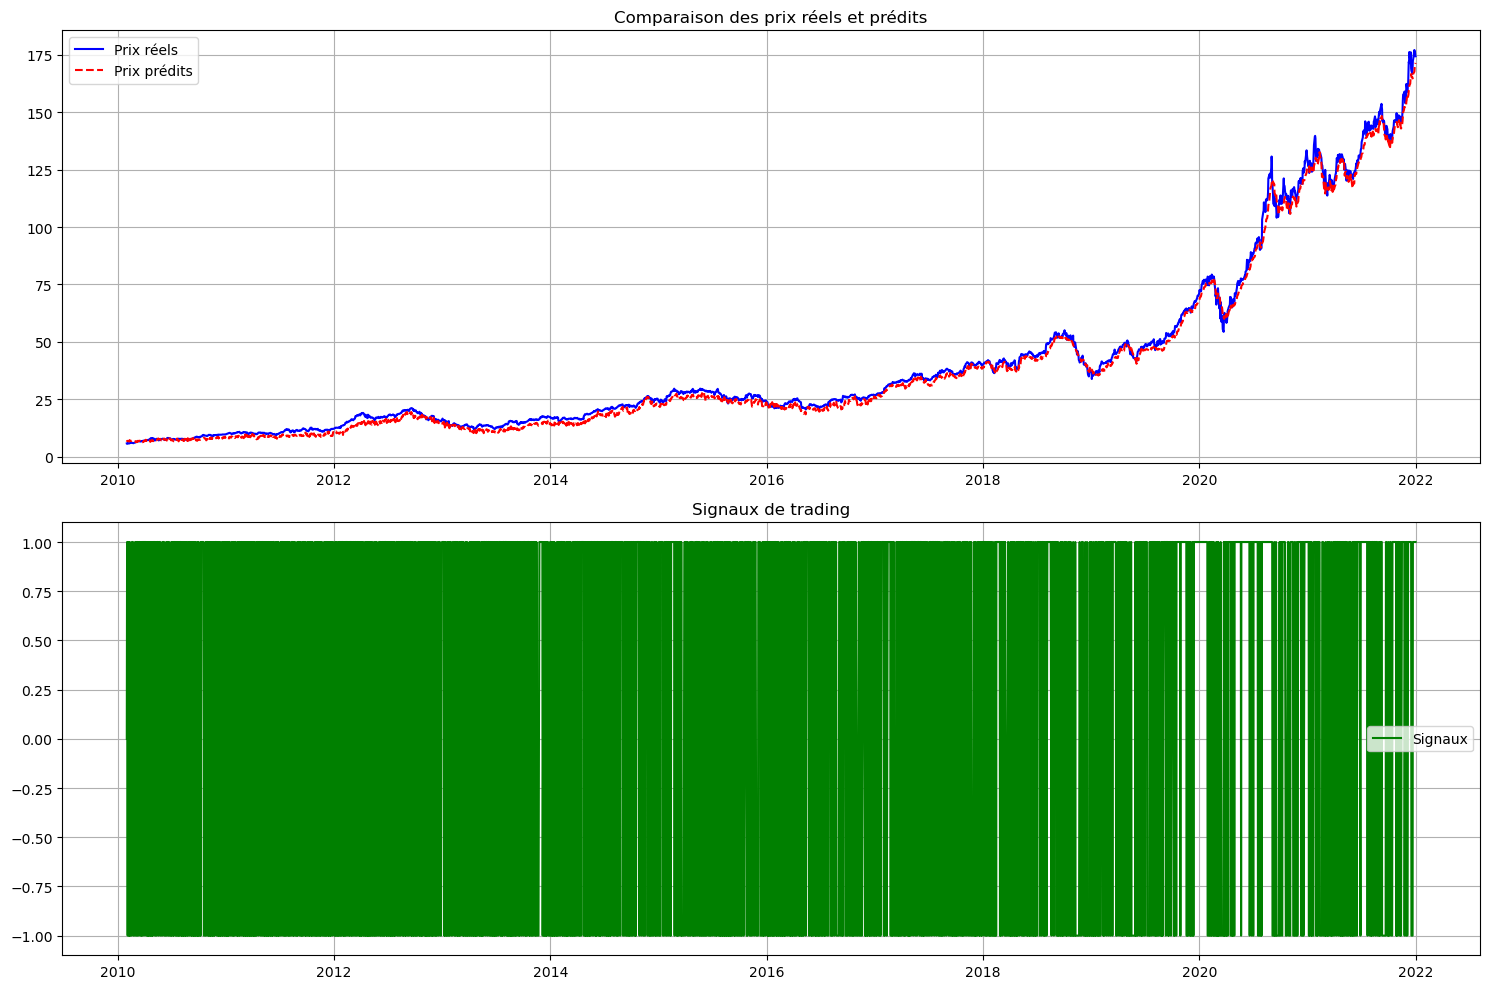


Scores MSE de validation croisée:
Fold 1: 0.000275
Fold 2: 0.000143
Fold 3: 0.004107
MSE moyen: 0.001508 (±0.001838)


In [ ]:
# Visualisation des prédictions et signaux
cnn_strategy.plot_signals(data)

In [ ]:
from sklearn.metrics import r2_score

# Récupération des prédictions et des valeurs réelles
predictions = cnn_strategy.predictions.flatten()
actual_prices = data_train['Close'].loc[cnn_strategy.signals.index].values

# Calcul du R²
r2 = r2_score(actual_prices, predictions)
print(f"R² Score: {r2:.4f}")

# Analyse de la performance au fil du temps
window_size = 60  # Fenêtre glissante de 60 jours
rolling_r2 = []
dates = []

for i in range(len(predictions) - window_size):
    window_r2 = r2_score(
        actual_prices[i:i+window_size],
        predictions[i:i+window_size]
    )
    rolling_r2.append(window_r2)
    dates.append(cnn_strategy.signals.index[i+window_size])

# Visualisation de l'évolution du R²
plt.figure(figsize=(15, 6))
plt.plot(dates, rolling_r2)
plt.title('Évolution du R² sur une fenêtre glissante de 60 jours')
plt.xlabel('Date')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

# Analyse des erreurs de prédiction
errors = predictions - actual_prices

plt.figure(figsize=(15, 6))
plt.plot(cnn_strategy.signals.index, errors)
plt.title('Erreurs de prédiction au fil du temps')
plt.xlabel('Date')
plt.ylabel('Erreur (Prédit - Réel)')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des erreurs
print(f"\nStatistiques des erreurs de prédiction:")
print(f"Erreur moyenne: {np.mean(errors):.2f}")
print(f"Écart-type des erreurs: {np.std(errors):.2f}")
print(f"Erreur absolue moyenne: {np.mean(np.abs(errors)):.2f}")
print(f"Erreur maximale: {np.max(np.abs(errors)):.2f}")

## Comparaison avec le CNN complexe

Points clés :
1. Temps d'entraînement significativement réduit
2. Moins de risque de surapprentissage
3. Plus facile à interpréter

Différences principales :
- 5 indicateurs techniques au lieu de 23
- 1 couche convolutive au lieu de 3
- Architecture plus légère (moins de neurones)
- Early stopping plus agressif (patience=5)